In [2]:
%matplotlib inline

import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Run all output interactively
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

PROJECT_DIR = os.path.dirname(os.getcwd())

In [99]:
wine = pd.read_csv(PROJECT_DIR + '/data/raw/winemag-data-130k-v2.csv', index_col = 0)

In [98]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,log_price,excellent+
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,2.708050,0
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,2.639057,0
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,2013,2.564949,0
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,2012,4.174387,0
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem,2011,2.708050,0


In [5]:
wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [6]:
# Extract year from title
## regex to extract date (matching wines from 20th and 21st century)
wine['year'] = wine['title'].apply(lambda x: re.search(r'(19|20)[0-9]{2}', x))  # _sre.SRE_Match object returned
year_exists = ~pd.isnull(wine['year'])  # Find where there is a match 
wine.loc[year_exists, 'year'] = wine.loc[year_exists, 'year'].apply(lambda x: x.group(0))  # extract year where there is a match
wine['year'] = wine['year'].fillna(0)  # For now, just fill missing values with 0
wine['year'] = wine['year'].astype(int)

In [7]:
pd.set_option('display.max_colwidth', -1)
wine['description'].head()

0    Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                             
1    This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.                      
2    Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.                                                               
3    Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.                               

Determine which columns are numeric and which are categorical

In [8]:
numeric_cols = wine._get_numeric_data().columns
categoric_cols = [c for c in numeric_cols if c not in wine.columns]

In [9]:
wine = wine.dropna(subset = ['points'], axis = 0, how = 'any')

In [10]:
wine['points'].corr(wine['price'])

0.41616674186062252

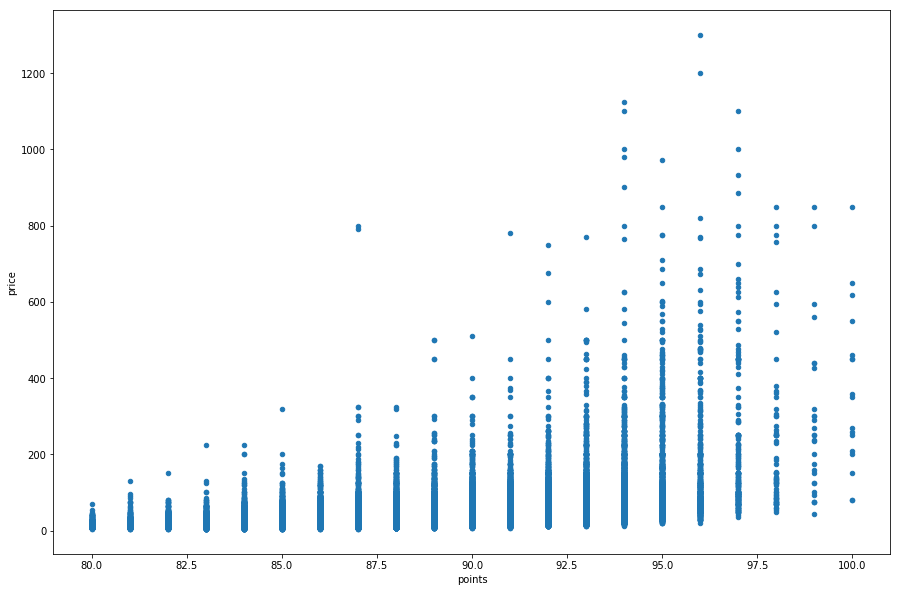

In [11]:
wine = wine.loc[wine['price'] < 1500]
wine.plot.scatter('points', 'price', figsize = (15, 10));

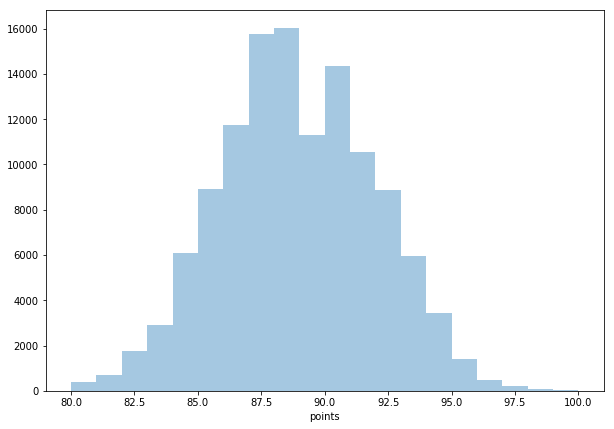

In [12]:
plt.figure(figsize = (10, 7))
sns.distplot(wine['points'], kde = False, bins = 20);

`Price` has many outliers. We can log-transorm it to make it look more akin to a normally-distributed variable, even though it still has a positive skew, due to outliers.

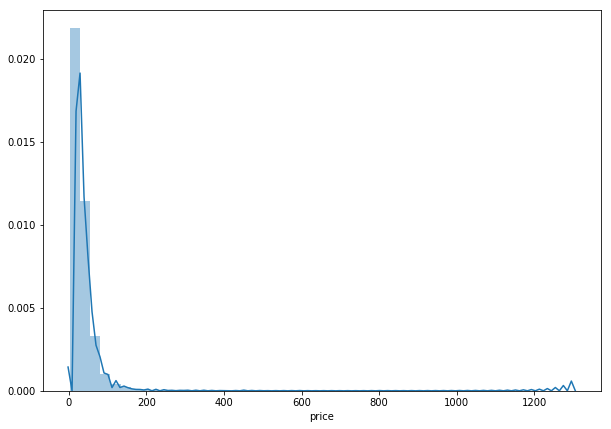

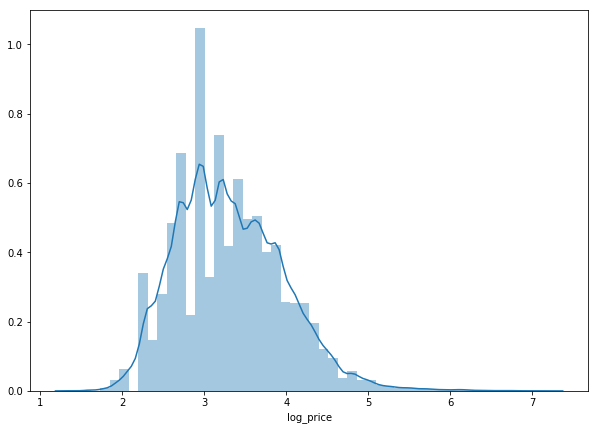

In [13]:
price = wine['price'].dropna()
plt.figure(figsize = (10, 7))
ax = sns.distplot(price)
ax.set_xlabel('price')
plt.show();

log_price = np.log(price)
plt.figure(figsize = (10, 7))
ax = sns.distplot(log_price)
ax.set_xlabel('log_price')
plt.show();

wine['log_price'] = log_price;

The relationship between the `points` has a much higher Pearson's correlation coefficient with the log-transformed `price` than the unadulterated version. But, interestingly, it's very close to Spearman's rank correlation coefficient, which measures the monotonic relationship bewteen the variables.

In [14]:
wine['points'].corr(price)
wine['points'].corr(log_price)
wine['points'].corr(log_price, method = 'spearman')

0.45829672126468129

0.61185277821010209

0.60572121131406531

In [115]:
wine['excellent+'] = np.where(wine['points'] >= 90, 1, 0)

In [16]:
wine.groupby('excellent+').describe()

log_price                                                    \
               count      mean       std       min       25%       50%   
excellent+                                                               
0           75583.0   3.052649  0.532544  1.386294  2.708050  2.995732   
1           45383.0   3.750104  0.600247  1.945910  3.332205  3.688879   

                                 points              ...   price          \
                 75%       max    count       mean   ...     75%     max   
excellent+                                           ...                   
0           3.401197  6.684612  75583.0  86.517960   ...    30.0  800.0    
1           4.094345  7.170120  45383.0  91.591301   ...    60.0  1300.0   

               year                                                        \
              count         mean         std  min     25%     50%     75%   
excellent+                                                                  
0           75583.0  1926.203088  403.301593  0.0  2008.0  2011.0  2013.0   
1           45383.0  1967.631756  291.731258  0.0  2009.0  2012.0  2013.0   

                    
               max  
excellent+          
0           2017.0  
1           2017.0  

[2 rows x 32 columns]

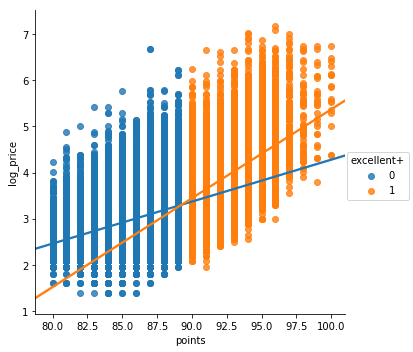

In [17]:
sns.lmplot('points', 'log_price', data = wine, hue = 'excellent+');

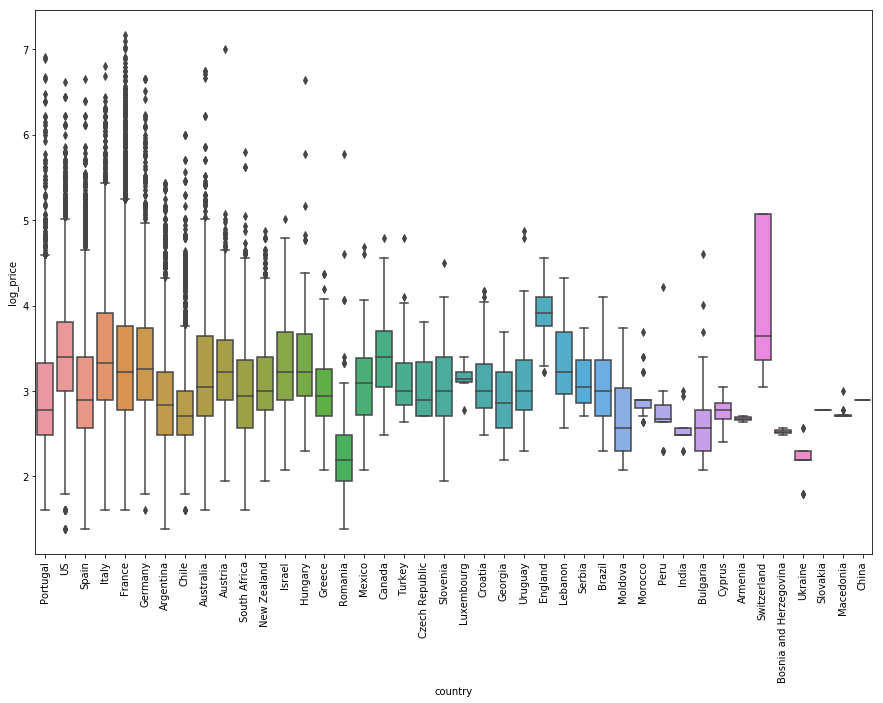

In [18]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(y = wine['log_price'], x = wine['country'])
plt.xticks(rotation = 90);

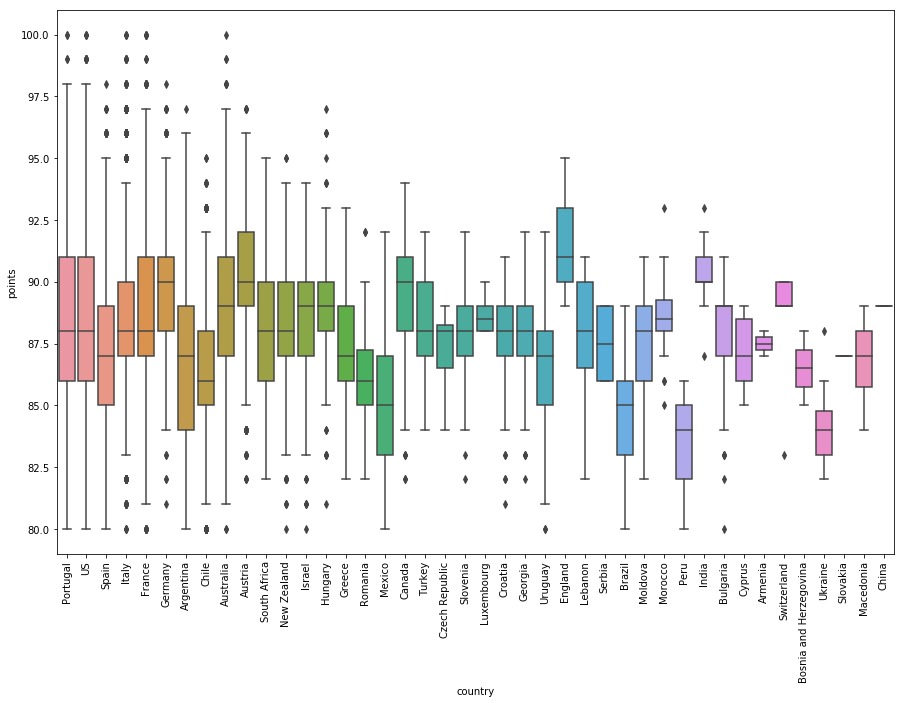

In [19]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(y = wine['points'], x = wine['country'])
plt.xticks(rotation = 90);

In [20]:
wine.duplicated(subset = 'title').value_counts()

False    110629
True     10337 
dtype: int64

In [21]:
wine = wine.drop_duplicates(subset = 'title')

In [116]:
counts = wine['excellent+'].value_counts()
counts/counts.sum()

0    0.622647
1    0.377353
Name: excellent+, dtype: float64

In [50]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn import metrics

In [33]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'year', 'log_price', 'excellent+'],
      dtype='object')

In [34]:
wine['variety'].value_counts().shape
wine['designation'].value_counts().shape

(697,)

(35776,)

In [93]:
data = wine[['excellent+', 'country', 'log_price', 'variety', 'year']]
data = pd.get_dummies(data, columns = ['country', 'variety'])

X = data.drop('excellent+', axis = 1)
y = data['excellent+']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X.shape
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(classifier.fit(X, y), prefit=True)
X_new = model.transform(X)
X_new.shape

classifier = LogisticRegression(random_state = 0)
y_pred = cross_val_predict(classifier, X, y, cv = 10)
y_pred_probs = cross_val_predict(classifier, X, y, cv = 10, method='predict_proba')
# classifier.fit(X_train, y_train)
# y_pred_probs = classifier.predict(X_test)

print(confusion_matrix(y, y_pred))
print(metrics.classification_report(y, y_pred))
print(metrics.accuracy_score(y, y_pred))
print(metrics.roc_auc_score(y, y_pred_probs[:, 1]))

In [ ]:
data2 = wine[['excellent+', 'log_price']]

X2 = data2.drop('excellent+', axis = 1)
y = data2['excellent+']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier2 = LogisticRegression(random_state = 0)
y_pred2 = cross_val_predict(classifier, X2, y, cv = 10)
y_pred_probs2 = cross_val_predict(classifier, X2, y, cv = 10, method='predict_proba')
# classifier.fit(X_train, y_train)
# y_pred_probs = classifier.predict(X_test)

print(confusion_matrix(y, y_pred2))
print(metrics.classification_report(y, y_pred2))
print(metrics.accuracy_score(y, y_pred2))
print(metrics.roc_auc_score(y, y_pred_probs2[:, 1]))

Automatically created module for IPython interactive environment


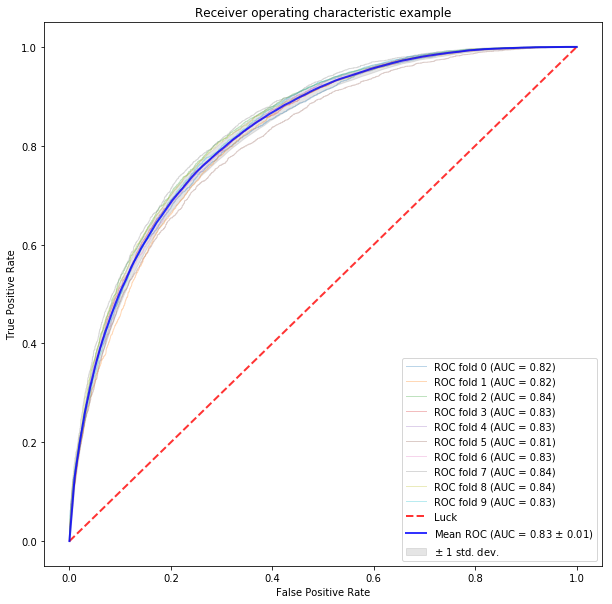

In [73]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
X = np.array(X)
y = np.array(y)
n_samples, n_features = X.shape

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression(random_state = 0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize = (10, 10))

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();